In [1]:
import matplotlib.pyplot as plt
from QuantLib import *

In [2]:
# helper function to make the notebook less verbose
def set_unit_square(ax):
    ax.axis('scaled')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

Covering a unit square
The dimensionality of the problem is 2 .With pseudo-random numbers, it doesn't matter much: we can just extract numbers and form pairs from them.

In [3]:
rng = MersenneTwisterUniformRng(42)

In [5]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.next().value())
    ys.append(rng.next().value())

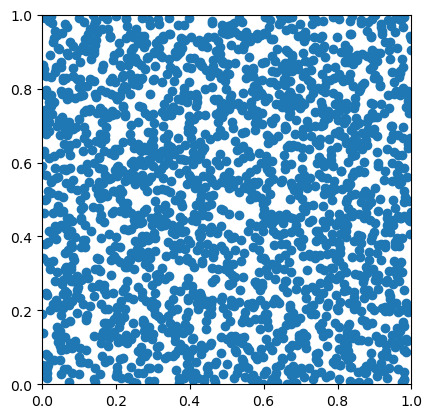

In [6]:
fig, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs, ys, 'o')


The same doesnt hold for quasi-random numbers. Each number is correlated to the one that follows it, which ruins the random properties of the sequence when used with the wrong dimensionality.


In [7]:
rng = SobolRsg(1)

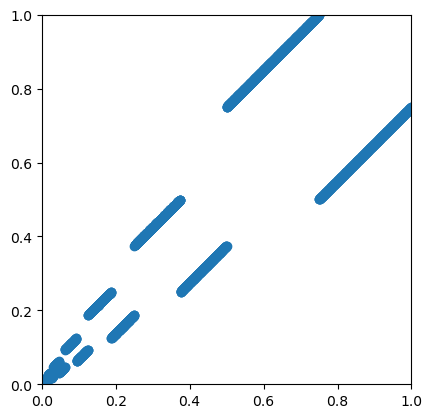

In [8]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.nextSequence().value()[0])
    ys.append(rng.nextSequence().value()[0])
fig, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs, ys, 'o')

to cover the domain correctly, we have to use the right dimensionality.


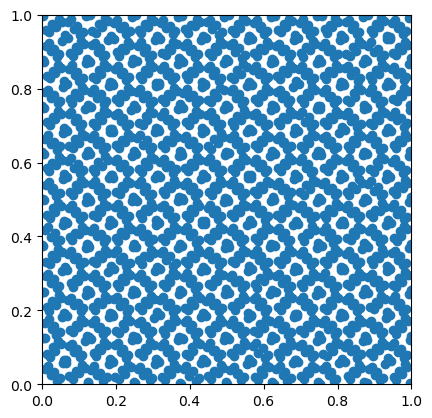

In [9]:
rng = SobolRsg(2)
xs = []
ys = []
for i in range(2047):
    x, y = rng.nextSequence().value()
    xs.append(x)
    ys.append(y)
fig, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs, ys, 'o')

High DImensionality and quality of randomness

Quasi-random numbers with high dimensionality are known to have better randomness in the first components of the generated sequences and worse in the last ones.

This ia not a problem with a low number of dimensions...

In [10]:
rng = SobolRsg(3)
xs = [rng.nextSequence().value() for i in range(1023)]

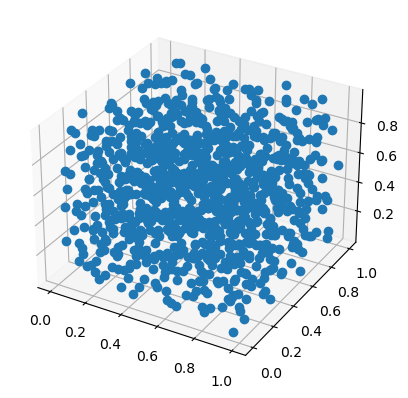

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X, Y, Z = zip(*xs)
g = ax.plot(X, Y, Z, 'o')

...which can be easier to see by looking at projections over planes

In [12]:
def section(xs, i):
    return [x[i] for x in xs]

In [13]:
def project(ax, xs, i, j, title=None):
    set_unit_square(ax)
    ax.set_title(title or "(%d, %d)" % (i, j))
    ax.plot(section(xs, i), section(xs, j), 'o')

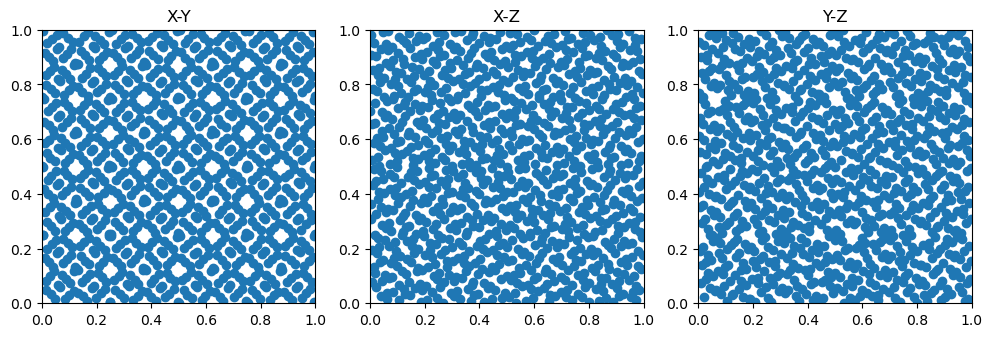

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
project(ax[0], xs, 0, 1, "X-Y")
project(ax[1], xs, 0, 2, "X-Z")
project(ax[2], xs, 1, 2, "Y-Z")

...but with a higher dimensions and note enough draws, it can cause some subspaces to be covered incorrectly.

In [15]:
seed = 242656
rng = SobolRsg(5000, seed)

In [16]:
xs = [rng.nextSequence().value() for i in range(511)]

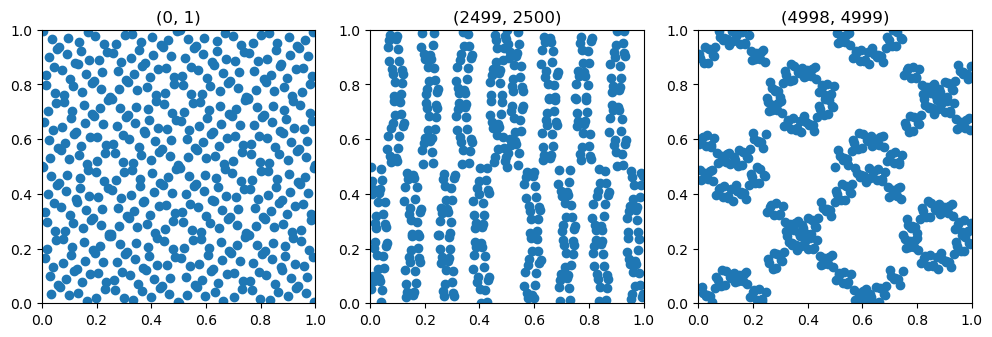

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
project(ax[0], xs, 0, 1)
project(ax[1], xs, 2499, 2500)
project(ax[2], xs, 4998, 4999)

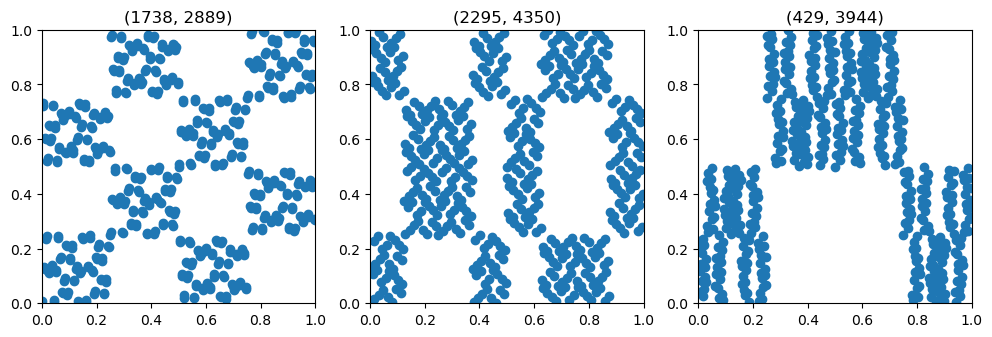

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
project(ax[0], xs, 1738, 2889)
project(ax[1], xs, 2295, 4350)
project(ax[2], xs, 429, 3944)

With pseudo-random numbers, we'd have bad statistics but at least the points would be scattered around randomly.

In [20]:
rng = MersenneTwisterUniformRng(42)

In [21]:
xs =[ [rng.next().value() for i in range(5000)] for _ in range(511)]

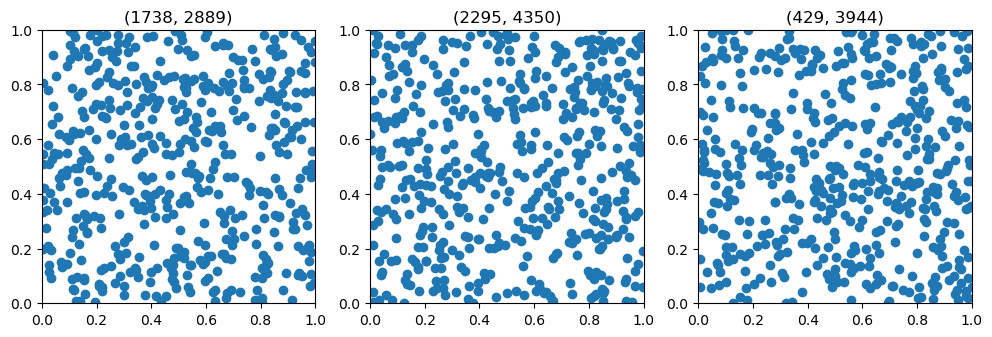

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
project(ax[0], xs, 1738, 2889)
project(ax[1], xs, 2295, 4350)
project(ax[2], xs, 429, 3944)
